# Three important tools to know

> **skills to take away**
>
> - *Basic*: Plotting $y=f(x)$ and histograms with NumPy/Matplotlib, dataframes from CSV, acces row/columns (iloc, loc)
> - *Medium*: Scatter plots, dataframe cleaning and plotting, curve fitting
> - *Expert*: Meshgrid and 3D plots for $y=f(x,y)$


## A word of caution

The three important tools discussed in this section, namely Matplotlib, Pandas, and SciPy, are *only introduced*. A decently extensive presentation would deserve an entire book for each of them. The main goal of this chapter is to give the very basic and practical features of each of them, so that you can search for more detailed information when you need it.


## Graphical representation of data: Matplotlib

Matplotlib is an extremely rich library for data visualization and there is no way to cover all its features in this note. The goal of this section is just to give short and practical examples to plot data. Much more details can be obtained on the [webpage](https://matplotlib.org/index.html). Another interesting link to understand the structure of a Matplotlib plot is a [post on Real Python website](https://realpython.com/python-matplotlib-guide). The following shows how to quickly make *histograms*, *graphs*, *2D and 3D scatter plots*. 


The main object of Matplotlib is `matplotlib.pyplot` imported as `plt` here (and usually). The most common functions are then called on this object, and often take NumPy arrays as arguments (possibly with more than one dimension) and a lot of `kwargs` to define the plotting style.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example of 1D plots and histograms

To work with data, we generate two samples of 1000 values distributed according to a normal probability density function with $\mu=-1$ and $\mu=1$ respectively, and $\sigma=0.5$. These data are stored in a NumPy array `x` of shape `x.shape=(1000, 2)`. We then compute and store the sine of all these values into an array of the same shape called `y`.

In [2]:
x = np.random.normal(0, 1, size=10000)
x.std()

1.0079194897069854

In [3]:
np.linspace(3, 8, 4)

array([3.        , 4.66666667, 6.33333333, 8.        ])

Text(0, 0.5, 'counts')

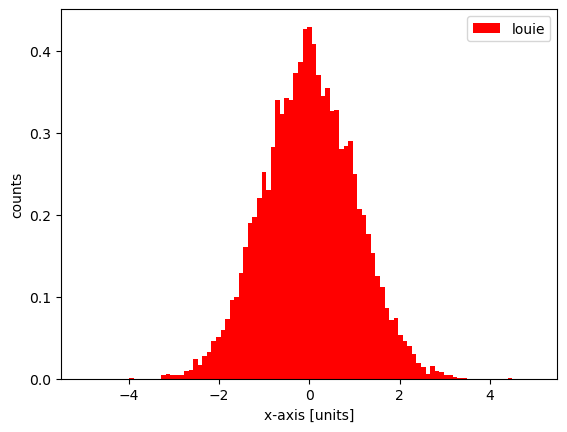

In [4]:
plt.hist(x, bins=np.linspace(-5,5,100), color='red', label='louie', density=True);
plt.legend()
plt.xlabel('x-axis [units]')
plt.ylabel('counts')

In [5]:
x = np.random.normal(loc=[-1, 1], scale=[0.5, 0.5], size=(1000,2))
y = np.sin(x)

In [6]:
x

array([[-0.75064881,  1.99095119],
       [-1.34492465,  0.24412268],
       [-0.61329424,  0.97163982],
       ...,
       [-0.79621773,  0.74292644],
       [-1.1128411 ,  0.82932989],
       [-1.73092593,  1.07957405]])

The next step is to plot this data in two ways: first, we want `y` vs. `x`; second, we want the histogram of the `x` values. We need to first create a figure, then create two *subplots* (specifying the number of rows, columns, and subplot index). Note that Matplotlib always takes the first dimension to define the numbers to plot, while higher dimensions are considered as other plots that are automatically overlaid.

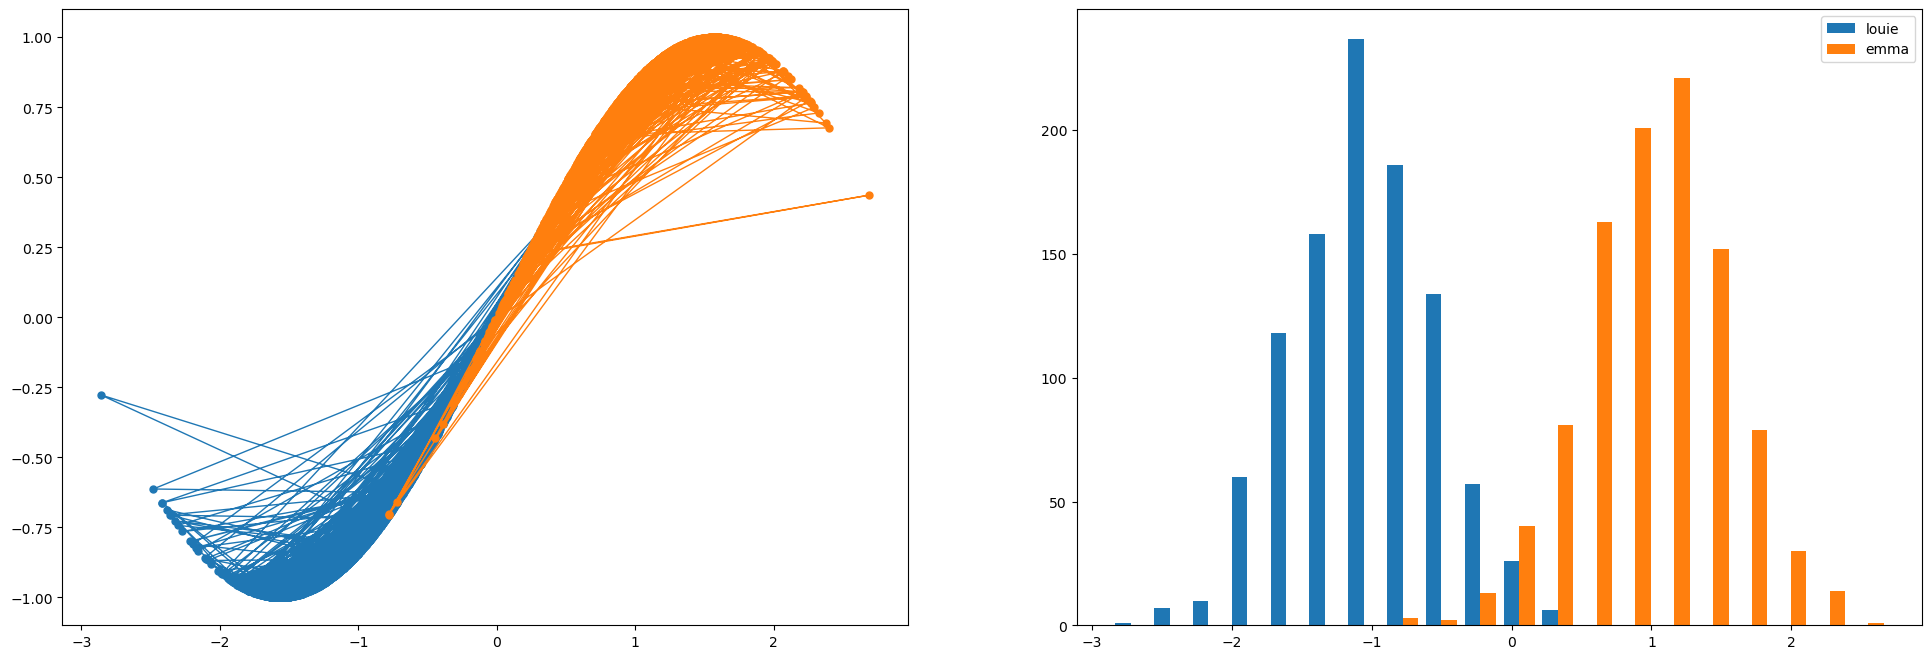

In [7]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1) # 121 means 1 line, 2 column, 1st plot
plt.plot(x, y, marker='o', markersize=5, linewidth=1.0)
plt.subplot(1, 2, 2) # 122 means 1 line, 2 column, 2nd plot
plt.hist(x, bins=20, label=['louie', 'emma']);
plt.legend()

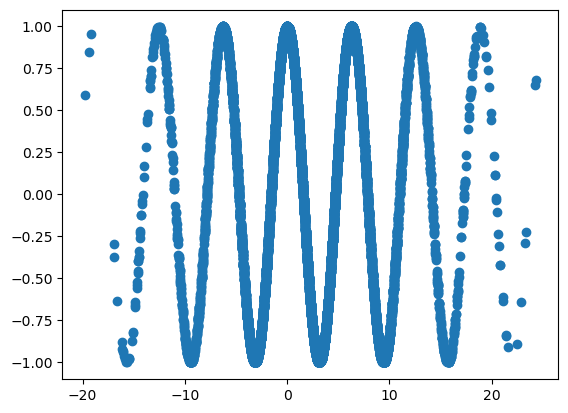

In [8]:
x = np.random.normal(2.5, 6, size=10000)
y = np.cos(x)
plt.scatter(x, y)

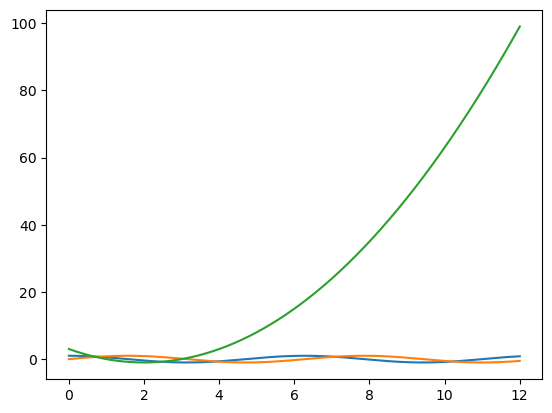

In [9]:
x = np.linspace(0, 12, 10000)
y = np.cos(x)
y2 = np.sin(x)
plt.plot(x, y)
plt.plot(x, y2)

def someOperation(x):
    return x**2 - 4*x + 3
y3 = someOperation(x)
plt.plot(x, y3)

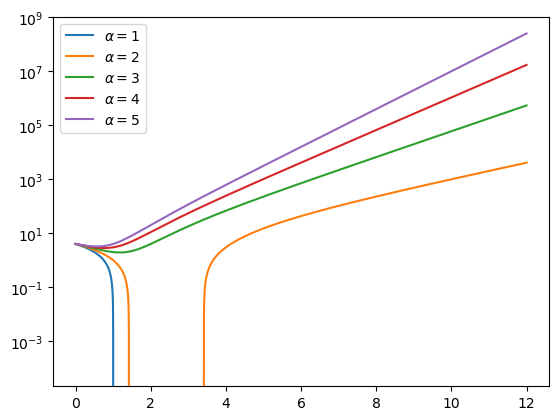

In [10]:
def someFunction(x,a):
    return a**x - 4*x + 3
for a in range (1, 6):
    
    y = someFunction(x,a)
    plt.plot(x, y, label= f'$\\alpha={a}$')
plt.legend()
plt.yscale('log')

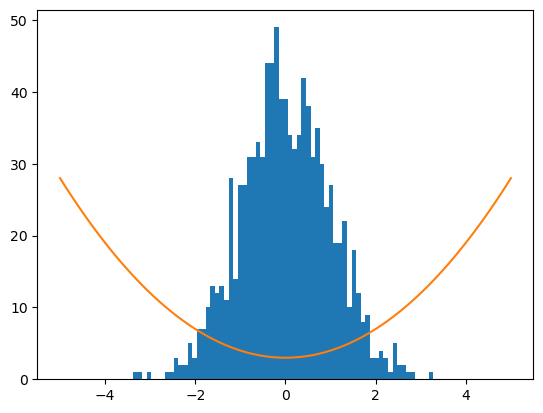

In [11]:
x = np.random.normal (loc=0, scale=1, size=1000)
plt.hist(x, bins =np.linspace(-5,5,100))
x2 = np.linspace(-5,5,100)
y = x2**2+3
plt.plot(x2,y)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 172., 129.,  89.,  58.,  55.,  48.,
         38.,  33.,  28.,  30.,  21.,  28.,  18.,  13.,  20.,  19.,  14.,
         12.,  12.,   9.,  10.,   3.,  12.,  12.,   8.,   7.,   5.,  10.,
          9.,   5.,   2.,   3.,   5.,   6.,   3.,   3.,   2.,   0.,   6.,
          0.,   3.,   1.,   2.,   0.,   1.,   4.,   4.,   2.,   1.,   2.]),
 array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
        -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
        -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
        -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
        -2.97979798, -2.87878788, -2.777

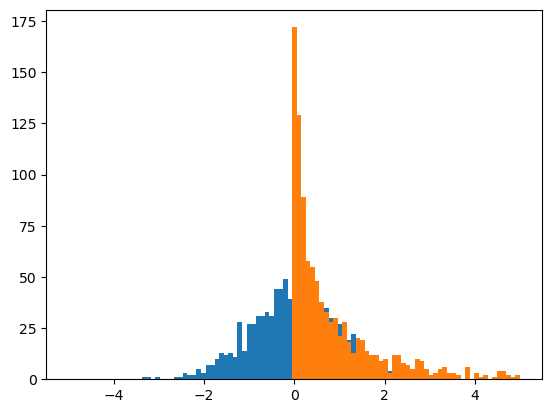

In [12]:
ydata, mybins, _ =plt.hist(x, bins =np.linspace(-5,5,100))
plt.hist(x**2, bins =mybins)

In [13]:
bins

NameError: name 'bins' is not defined

### Example of 2D scatter plot

A scatter plot allows us to draw markers in a 2D space, with a third piece of information encoded into the marker size. To demonstrate this, we generated two sets of 5000 numbers distributed according to uncorrelated Gaussians with means $\mu_0=\mu_1=0$ and standard deviations $\sigma_1=0.5$ and $\sigma_2=0.8$. These numbers are stored in a NumPy array called `points`, with a shape of `points.shape=(5000,2)`. We then interpret these two sets of numbers as $(x,y)$ positions and load them into two `(5000, 1)` arrays called `x` and `y`:

In [ ]:
points = np.random.normal(loc=[0, 0], scale=[0.5, 0.8], size=(5000,2))
x, y = points[:, 0], points[:, 1]

We can then plot the 5000 points in the 2D plane, and here we specify the marker size as $100\times\sin^2(x)$ using the argument `s` of the `plt.scatter()` function (note that the arrays `x`, `y`, and `s` must have the same shape):

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, color='k', marker='+', alpha=0.5, s=100*(np.sin(x)**2)) #, s=100*(np.sin(x))**2, marker='o', alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [ ]:
plt.errorbar(x[:20], y[:20], linewidth=0, marker='o', color='k', yerr=1, elinewidth=1, capsize=5)

### Example of 3D plots

For 3D plots, one can generate 1000 positions in space and perform a translation by a vector $\vec{r}_0$ using broadcasting.

In [ ]:
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 2])
data_trans = data + r0

It is then easy to get back the spatial initial (i.e. before translation) and final (i.e. after translation) coordinates.

In [ ]:
xi, yi, zi = data[:,0], data[:,1], data[:,2]
xf, yf, zf = data_trans[:,0], data_trans[:,1], data_trans[:,2]

An additional module must be imported in order to plot data in three dimensions, and the projection has to be specified. Once this is done, a simple call to `ax.scatter3D(x, y, z)` will create the plot. Note that we call a function of `ax` and not `plt` as before. This is because of the `ax = plt.axes(projection='3d')` command, which is necessary for 3D plotting. More details are available in the [matplotlib 3D tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

In [ ]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter3D(xi, yi, zi, alpha=0.4, label='before translation')
ax.scatter3D(xf, yf, zf, alpha=0.4, label='after translation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(frameon=False, fontsize=12);

### Example of 2D function $z=f(x, y)$: notion of `meshgrid`

Another typical plot we might want to create is a representation of a function of two variables $(x,y)$ in 3D: $z=f(x,y)$. In Python, this requires the use of the `meshgrid` function, which may not be immediately obvious. Let's begin by defining a function with two variables:

In [ ]:
def my_surface(x, y):
    x0 = 5*np.sin(y)
    sigma = 5+y
    amp = (10-y)
    return amp*np.exp(-(x-x0)**2/sigma**2)

Let's define an $(x, y)$ interval on which we want to describe the surface:

In [ ]:
x = np.linspace(-40, 40, 100)
y = np.linspace(0, 20, 200)

These two NumPy arrays don't have the same shape, and an explicit loop would be needed to process them, which is very time-consuming in Python. This is where the *meshgrid* notion comes in: it will provide two arrays *with the same size* and allow for vectorization.

In [ ]:
# Meshgrid and function application (see after for more details)
xx, yy = np.meshgrid(x, y)
Z = my_surface(xx, yy)

# Plotting
plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, Z)

# Choose the default view
ax.view_init(azim=48, elev=48);

**Meshgrid explanation.** The *meshgrid* consists of two 2D arrays made out of two 1D arrays. The main purpose is to have NumPy arrays with the same shape, which can then support vectorized operations. The logic is relatively straightforward and can be understood with two points along each coordinate. Let's assume you want to scan the {0, 1} $x$-values and {2, 3} $y$-values, then you need to build up the four following 2D points: (0, 2), (1, 2), (0, 3), (1, 3). These four points can be encoded in the two arrays `[[0, 1], [0, 1]]` and `[[2, 2], [3, 3]]`. These two arrays have the same shape, which is similar to the result of `f(x,y)` computed on this grid, even if there are *not the same numbers of $x$ and $y$ values*. 

In [ ]:
# Create a simple 2-variables function
def f(x, y):
    return x**2+y**2

# Define x-values, y-values and create the 2D
x, y = np.arange(0, 2), np.arange(2, 4)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

# Printing arrays
print('Array values:')
print('xx={}'.format(xx))
print('yy={}'.format(yy))
print('zz={}'.format(zz))

A way to explicitly create the meshgrid is to flatten the `xx` and `yy` arrays using the `ravel()` function, and then take each pair using the `zip()` syntax. This ensures that every point is formed.

In [ ]:
for i, j in zip(xx.ravel(), yy.ravel()):
    print(f'(x,y)=({i},{j}); f(x,y)={f(i,j)}')

If you want to read more about this, you can check the [NumPy meshgrid documentation](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.meshgrid.html) and this [Stack Overflow post](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy). For more advanced readers, there are two similar functions which return slightly different objects: `np.ogrid()` and `np.mgrid()`. For a nice discussion of the differences, you can check [this post](http://louistiao.me/posts/numpy-mgrid-vs-meshgrid/).

## Import and Manipulate Data: `pandas`

The package `pandas` is a very rich interface to read data from different formats and produce a `pandas.DataFrame` that can be used an NumPy arrays (but containing a lot more features). There is no way to fully describe this package here; the goal is simply to give functional and concrete examples that are easily usable. For more details, please check the [pandas webpage](https://pandas.pydata.org/). For the reader who are familiar with databases, the logic behind dataframes is quite similar to the one of databases.

### Data importation and structure

Many built-in functions are available to import data as a Pandas DataFrame. One particularly convenient function directly reads CSV files. It allows you to specify the columns to load, the rows to skip, and many other options. The obtained object is called a *dataframe* and can be seen as a 2D array: each columns represents a feature, and is a `pandas.Series` object, while each line is one observation. The example below illustrates this for a dataset describing some waves. 

**Comments**:
 + the very first column (the one without a name) is called the *index* of the dataframe and allow to access the individual observations. The index is an integer by default (counting the number of lines) but can also be something else (string, bar code, etc...).
 + numpy syntax (fency indexing, masking, etc ...) and universal function can apply to `pandas.Series`, and `pandas.DataFrame`.

In [ ]:
import pandas as pd
df = pd.read_csv('../data/WaveData.csv')
df.tail(20)
df['Hs'][df['Hs'] >1] # we can apply fancy indexing
df['Hs'].array # we can obtain a numpy array if we want, but the panda series is basically the same and has the same fatures

In [ ]:
df.tail(20)

In [ ]:
print(df['Hs'])
print(df.Hs)

In [ ]:
#adding a new column
df['newCol'] = df.Hs * df.SST
df

In [ ]:
# Rename columns names using df.rename() function
old_new_cols = {
    'Date/Time': 'date',
    'Hs': 'height',
    'Hmax': 'heightMax',
    'Tz': 'period',
    'Tp': 'energy',
    'Peak Direction': 'direction',
    'SST': 'temperature'
}

# The argument `inplace` means the current dataframe is overwritten with the change
df.rename(columns=old_new_cols, inplace=True)
print(df.head())

### Cleaning the dataset using NumPy syntax

It is possible to clean the dataframe using masking syntax. First, let's check how many default values are stored for each column (all but the date):

In [ ]:
# Check which wave has -99 values for every variables
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    n = np.count_nonzero(df[c]<=-99)
    print('{}: {} wave have <=-99'.format(c, n))

To take the waves with values above -99, we could simply apply a mask on the whole dataframe, such as `df_filtered = df[df>-99]`. However, this will lead to an error of type `’>’ not supported between instances of ’str’ and ’int’`. This is due to the date column which is of type string. To check the type of a pandas column, also called a pandas serie, one can:

In [ ]:
print(f'Type of date {df["date"].dtype} vs type of height {df["height"].dtype}')

One can then filter data to make sure that for each numerical column, there are no values below -99:

In [ ]:
# Removing all entry (line) which has at least one default value
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    idx_for_this_col = df[c]>-99
    df = df[idx_for_this_col]

print(df.head())

We can now check that there is no more default values:

In [ ]:
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    n = np.count_nonzero(df[c]<=-99)
    print('{}: {} wave have <=-99'.format(c, n))

In [ ]:
for c in df.columns:
     print(c)

In [ ]:
df.temperature.to_numpy()

### Access and add information in a DataFrame

#### By column

In order to access a given column, *i.e.* all numbers of a given feature for all realisation, one can do:
```python
vals = df.col_name    # like an attribute
vals = df['col_name'] # like a dictionnary
```

One of the nice features of pandas is the ability to easily store the result of a computation as a new column, simply with the following syntax:
```python
df['new_col'] = function(df.old_col)
# Comment: df.new_col syntax will not work 
# to create a new column
```

**Comment.** The `vals` object as defined below is a `pandas.Series`, and this is possible (and sometime better) to use the associated NumPy array doing `a = vals.values`, or `a = vals.to_numpy()`. The `to_numpy()` function works for dataframes and not only for series: `df[['col1', col2]].to_numpy()`. The typical use cases to work with an array are: keeping only what's needed (just the numbers, not indices/labels) and avoid internal copy from pandas (which might slow down your code). This last point is illustrated below with a factor 10 in term of speed:

In [ ]:
# This will generate a warning (more details on the link 
# of the warning message), and will be slow
def replace_nan_by_val_PANDA(data, col, val):
    data[col][np.isnan(data[col])] = val

replace_nan_by_val_PANDA(df, 'height', -100)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
%timeit replace_nan_by_val_PANDA(df, 'height', -100)
warnings.resetwarnings()

In [ ]:
# This will not generate the warning and be much faster (~10 times)
def replace_nan_by_val_NUMPY(data, col, val):
    v = data[col].to_numpy()
    v[np.isnan(v)] = val
    data[col] = v
    
replace_nan_by_val_NUMPY(df, 'height', -100)

In [ ]:
%timeit replace_nan_by_val_NUMPY(df, 'height', -100)

**Example.** It's a common practice in machine learning to *normalize* the input variables, i.e., transform them to have a mean of 0 and a variance of 1.0. The following example shows how to add new columns that are normalized, starting with some simplified python code, and then the actual code.

```
# Simplified python code
#-----------------------

# 1. Function doing the normalization
def norm_var(v):
    v[v is nan] = 0           # Replace nan by 0.0
    return (v-mean(v))/rms(v) # return the normalized values

# 2. Calling this function for all cols, and add the result to df
for c in df.column:
    df[c+'norm'] = norm_var(df[c])
```

In [ ]:
# Define the function doing the job
def normalized_variable(v):
    
    # Make sure this is a numpy array
    v = np.array(v)
    
    # Replace NaN by 0.0
    v[np.isnan(v)] = 0
    
    # Compute quantities
    v_mean = np.mean(v)
    v_rms = np.sqrt(np.mean((v-v_mean)**2))

    # Add them into the pandas dataframe
    return (v-v_mean)/v_rms

# Calling this function on every column to be normalized
for c in ['height', 'heightMax', 'period', 'energy', 'direction', 'temperature']:
    df[f'{c}_norm'] = normalized_variable(df[c])

# Print few values of the 5 first normalized columns only
normalized_cols = [c for c in df.columns.tolist() if '_norm' in c]
print(df[normalized_cols[:5]].head())

One can simply plot the content of a Pandas DataFrame using the name of the column (a more direct alternative than extracting a NumPy array). For instance, one can compare the evolution of the wave height after the transformation:

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['height'], bins=100, alpha=0.5, label='Original Wave Height $h$');
plt.hist(df['height_norm'], bins=100, alpha=0.5, label='$<h> = 0$, $\\sigma_{h}=1$');
plt.legend(frameon=False, fontsize='xx-large');

#### Full access: by row (line) and/or column

This is also possible to access the data of a single complete realisation, *i.e.* all features of one realisation, or simply few feature of few realisation, or any arbitary combinations based on features/realisation selection. This can be done thanks to two syntax : `df.loc[]` and `df.iloc[]` (note that thoses are not dataframe *methods*, but rather what we call an *indexor* - same kind of operator we call on a list for example). These two instructions works with the same logic, but the considered indices are different. Some examples are given below.
```python
df.loc[index value(s), column name(s)]  # first axis must be given the value of the index
df.iloc[line number(s), column numbers] # first (second) axis must be given the line (column) number
```
Here, index values and columns names can be a single element, or a lists. Line and column numbers and can be single, element, lists, masks, or even slices as used in numpy fency indexing.

In [ ]:
df.head(20)

In [ ]:
df.iloc[10]

In [ ]:
df.loc[12]

In [ ]:
# Since the dataframe was cleaned (of -99 values), 
# the indicies doesn't start at 0, but a 2.
print(df[['date', 'height', 'period']].head())

In [ ]:
# Access the first element with iloc: this must be the number of the row value
# namely, 0 (for the first row). Here we also specified 
# columns from 0 to 4 (excluded)
df.iloc[0, :4]

In [ ]:
# Access the first element with loc: this must be index value
# namely 2 (for the first row), for the first 4 column names
df.loc[2, df.columns[:4]]

In [ ]:
df.loc[2:5, ['height', 'date', 'heightMax', 'period' ]].to_numpy()

In [ ]:
np.sin(df.height)

### Example of plotting with matplotlib

It is possible to perform computations using pandas columns directly, but it can be useful (and faster) to extract NumPy arrays in case of more complex broadcasting or indexing. This can be done using the `df[col].values` or `df.to_numpy()` commands.

In [ ]:
# Get numpy array for further manipulations
T = df['temperature'].values
P = df['period'].values
H = df['heightMax'].values
E = df['energy'].values

In [ ]:
# Plot temperature vs period vs max_height vs energy
plt.figure(figsize=(15, 7))
plt.scatter(T, P , s=H**3, c=E, cmap='GnBu', alpha=0.4)
plt.colorbar(label='Energy')
plt.xlabel('Temperature')
plt.ylabel('Period');

### Data visualization within Pandas functions

There are also many plotting functions already included in the Pandas library. To show only one example (all functions are described in the [Pandas Visualization Tutorial](https://pandas.pydata.org/pandas-docs/stable/visualization.html)), here is the *scatter matrix* between variables (defined as a subset of the ones stored in the dataframe) obtained in a single line of code:

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[normalized_cols][:2000], figsize=(12, 12), alpha=0.2, s=50, diagonal='kde');

In [ ]:
# Apply a function column-wise
data.apply(lambda x:(x**2+x+1), axis=0)
print(data.head())

In [ ]:
# Apply a function row-wise (longer: explicit loop over lines)
data.apply(lambda x: 10-x, axis=1)
print(data.head())

### Some good-to-know fonctions for dataframe

```python
# 1. Import dataframe from CSV file
df = pd.read_csv('filename.csv')

# 2. Inspect (print) the first n entries
df.head(n)

# 3. Print some statistics per column
df.describe()

# 4. Cast a type into another (for e.g. a str '3' -> float 3)
df.col = df.col.as_type(np.float64)

# 5.Count the number of unique values in a serie
df.country.value_counts()

# 6. Group data by identical value of a given column
df.group_by('country')

# 7. Sort the data using a given column
df.sort_values(by='country')

# 8. Manage nan (fillna, dropna)
df.dropna()
df.fillna(val)
```

# Wednesday morning pandas and matplotlib challenge

- a) Open 'wave_data.csv' and print the number of columns
- b ) make a histogram, of the Hs variable. What is its mean?
- c) On the same figure and with the same binning, also plot the distribution of the maxHeight variable.
- d) Add a new colmun to the dataframe which is wavenumber = 1/period.
- e) make a scatter plot of  wavenumber against temperature. Shoud you use plt.plot or plt.scatter ? why ?

## Mathematics, physics, and engineering: SciPy

The [SciPy](https://scipy.org/) project is a Python-based ecosystem of open-source software for mathematics, science, and engineering. In particular, the following core packages are part of it: NumPy, Matplotlib, Pandas, the [SciPy library](https://docs.scipy.org/doc/scipy-1.2.0/reference/), and [SymPy](https://www.sympy.org/en/index.html) (symbolic calculations with mathematical expressions *à la* Mathematica).

### General overview

Obviously, there is no way to extensively present the SciPy library in this short introduction, but one can quickly summarize a few features and illustrate one with a concrete and useful example: fitting data points with a function. Among the main features, the SciPy library contains:

- Integration (`scipy.integrate`): integrals, differential equations, etc.
- Optimization (`scipy.optimize`): minimization, fits, etc.
- Interpolation (`scipy.interpolate`): smoothing methods, etc.
- Fourier Transforms (`scipy.fftpack`): spectral analysis, etc.
- Signal Processing (`scipy.signal`): transfer functions, filtering, etc.
- Linear Algebra (`scipy.linalg`): matrix operations, diagonalization, determinant, etc.
- Statistics (`scipy.stats`): random numbers, probability density function, cumulative distribution, etc.

### Curve Fitting Example

In [14]:
from scipy import optimize
from scipy import stats

Let's now show how to perform a fit of data with error bars using one particular function of `scipy.optimize`. First, we need to generate some data. We will choose 20 measurements with some noise of ~30% and a combined uncertainty of an absolute 0.1 uncertainty and 10% relative uncertainty.

In [15]:
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)


Then we need to define functions with which we want to fit our data, for example a degree 1 polynomial. The syntax has to be `func(x, *pars)`:

In [16]:
def pol1(x, p0, p1):
    return p0 + x*p1

The following lines actually perform the fit and return both the optimal parameters and the covariances for the degree 1 polynomial:

In [17]:
p, cov = optimize.curve_fit(pol1, x, y, sigma=dy)

One can then generalize the procedure by plotting the result of the fit for polynomials of several degrees, after having plotted the data. This is a good way to compare different models for the same data. First, we define an arbitrary degree polynomial `poly_func()` and we *vectorize* it using `np.vectorize` so that it can accept NumPy arrays.

In [18]:
def pol_func(x, *coeff):
    '''Arbitrary degree polynom: f(x) = a0 + a1*x + a2*x^2 + ... aN*x^N'''
    a = np.array([coeff[i]*x**i for i in range(len(coeff))])
    return np.sum(a)

pol_func = np.vectorize(pol_func)

In the previous call to `optimize.curve_fit()`, we didn't use an additional argument. For this example, we need to specify at least the starting point of the parameters `p0` because the number of parameters will be assessed using `len(p0)` (it's not known a priori since it is dynamically allocated). Other options can be specified, such as the minimum and maximum allowed values of parameters. Here is a wrap-up function performing the fit for an arbitrary polynomial degree:

In [19]:
def fit_polynom(degree):
    nPars = degree+1
    p0, pmin, pmax = [1.0]*nPars, [-10]*nPars, [10]*nPars
    fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}
    par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy, **fit_options)
    return par, cov

degree_max = 12

The following code tries every polynomial function up to a degree `degree_max`, performs the fit, and overlays the result for each function together with the experimental data on the same figure.

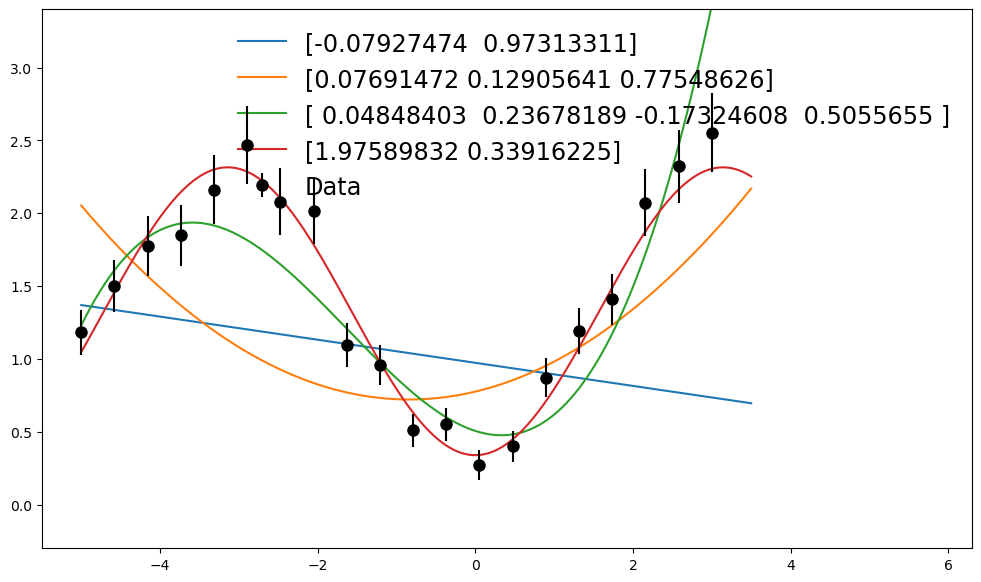

In [33]:
# Figure for the result
fig = plt.figure(figsize=(12,7))

# Fitting & plotting 
for d in np.arange(0, degree_max):
    par, cov = fit_polynom(d)
    #plt.plot(xcont, pol_func(xcont, *par), label='pol{}'.format(d), 
    #         linewidth=3, alpha=0.8)

# Plotting data
style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style)

def pol1(x, a, b):
    return a*x + b

def pol2(x, a, b, c):
    return a*x**2 + b*x + c

def pol3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def myFunction(x, a, b):
    return a * np.sin(x /2)**2 + b 


p, cov = optimize.curve_fit(pol1, x, y, sigma=dy)
plt.plot(xcont, pol1(xcont, *p), label = p)

p, cov = optimize.curve_fit(pol2, x, y, sigma=dy)
plt.plot(xcont, pol2(xcont, *p), label = p)

p, cov = optimize.curve_fit(pol3, x, y, sigma=dy)
plt.plot(xcont, pol3(xcont, *p), label = p)

p, cov = optimize.curve_fit(myFunction, x, y, sigma=dy)
plt.plot(xcont, myFunction(xcont, *p), label = p)

# Plot cosmetics
plt.xlim(-5.5, 6.3)
plt.ylim(-0.3, 3.4)
plt.legend(frameon=False, fontsize='xx-large');

It is possible to quantify how well a given model explains the observations by computing what we call the *goodness of fit*. In a frequentist approach, this can be assessed by the fraction of pseudo-data coming from - in principle - repeating the exact same experiment, with a worse agreement for a given model. The agreement can be quantified using $\chi^2 = \sum^{n}_{i=1} \frac{(y_i - f(x_i))^2}{{\sigma_i}^2}$ and its probability density function (PDF) directly gives access to the fraction of "worst pseudo-data" (by integrating the PDF from $\chi^2$ to $\infty$). More precisely, one can use the cumulative distribution function (CDF) of $\chi^2$ computed with $n$ degrees of freedom, for instance `Npoints`, *i.e.* `len(x)`. More details can be found, for example, in the [statistics review of the Particle Data Group](http://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf). The following two functions allow computing the goodness of fit:

In [34]:
def get_chi2_nDOF(y, dy, yfit):
    r = (y-yfit)/dy
    return  np.sum(r**2), len(y)

def get_pvalue(chi2, nDOF):
    return 1-stats.chi2.cdf(chi2, df=nDOF)

We can now perform all of these fits and extract the goodness of fit ($\chi^2$ and $p$-value) for each model.

In [35]:
# Fitting and getting p-value
degree, chiSquare, pvalue = [], [], []
for d in np.arange(degree_max):
    par, cov = fit_polynom(d)
    c2, n = get_chi2_nDOF(y, dy, pol_func(x, *par))
    degree.append(d), chiSquare.append(c2), pvalue.append(get_pvalue(c2, n))

The following piece of code plots both the $\chi^2$ and the $p$-value versus the degree of the polynomial using two different $y$-axes. This provides another way to use Matplotlib by defining explicit objects such as `ax` and `fig` and calling methods on those (referred to as the *stateless approach*), instead of using functions on `plt` (referred to as the *stateful approach*). For more details on these different approaches, see this [RealPython post](https://realpython.com/python-matplotlib-guide/#the-matplotlib-object-hierarchy).

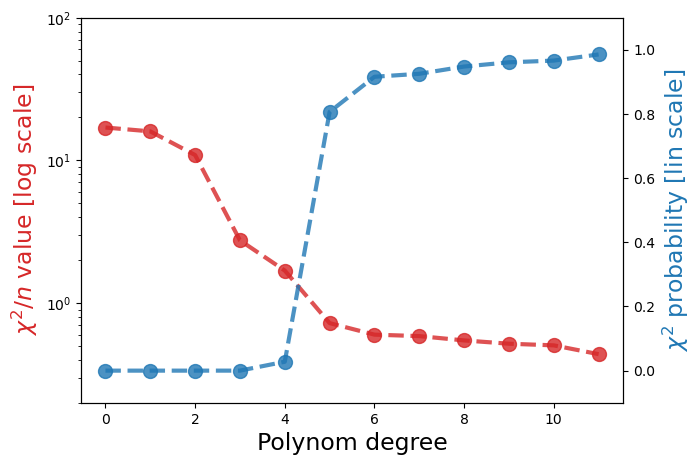

In [36]:
# Plotting the result with 2 different axis
fig, ax1 = plt.subplots(figsize=(7,5))
ax1.set_xlabel('Polynom degree', fontsize=17)
style = {'marker': 'o', 'markersize': 10, 'alpha': 0.8, 
         'linestyle': '--', 'linewidth': 3}

# Plot chi2/n
ax1.semilogy(degree, np.array(chiSquare)/Npoints, color='tab:red', **style)
ax1.set_ylim(0.2, 100)
ax1.set_ylabel('$\\chi^2/n$ value [log scale]', color='tab:red', fontsize=17)

# Plot p-values
ax2 = ax1.twinx()
ax2.plot(degree, pvalue, color='tab:blue', **style)
ax2.set_ylim(-0.1, 1.1)
ax2.set_ylabel('$\\chi^2$ probability [lin scale]', color='tab:blue', fontsize=17);

In [11]:
# a)
#help(np.random.normal)
values = np.random.normal(loc=0, scale=2, size=100000)
print(values)

[-0.27482051 -0.93914543  3.06609848 ... -0.11511531 -1.18559182
 -1.83756941]


# Thursday Morning Challenge

- a) Using `np.random.normal` generate a gaussian distribution of 100 000 points, centered around 0 and with width 2.
- b) Plot this distribution. Should you use a histogram, scatter or plot ?
- c) Write a function which takes an array x and returns $f(x) = a  e^{- (x-b)^2 / 2c^2}$
- d) Use `curve fit` to determine the best values of parameters a, b and c
- e) Plot the rsulting curve on top of the histogram

Text(0, 0.5, 'entries per bin')

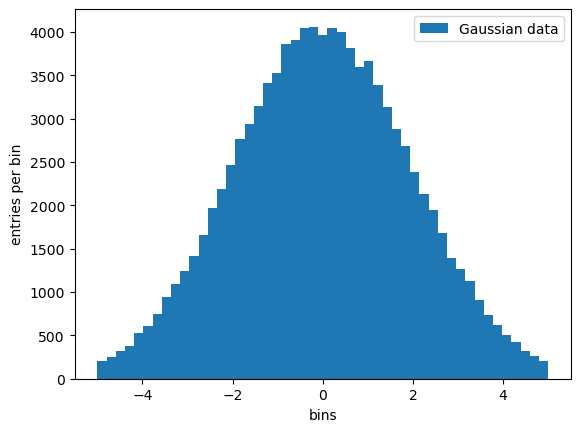

In [12]:
# b
import matplotlib.pyplot as plt
y, bins, _ = plt.hist(values, label = 'Gaussian data', bins=np.linspace(-5,5,50))
plt.legend()
plt.xlabel('bins')
plt.ylabel('entries per bin')

In [21]:
import numpy as np
# part c
def gaussian (x, a, b, c):
    '''
    This function takes as input an array x and returns $f(x) = a  e^{- (x-b)^2 / 2c^2}$.
    The parameters a, b qnd c are arguments f the function
    '''
    return a * np.exp(-1* (x-b)**2 / 2*c**2)

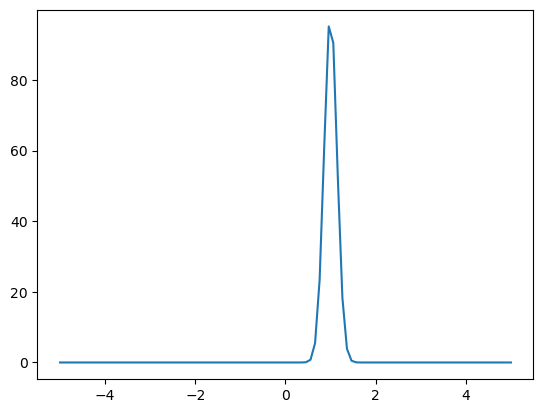

In [22]:
x = np.linspace(-5,5, 100)

gaussian (x, 99, 4, 7)

plt.plot(x, gaussian(x, 99, 1, 7))

In [36]:
# part d
import scipy 
binMidpoints =(bins[:-1] + bins [1:])/2


fittedParamValues, paramCorrelationMatrix = scipy.optimize.curve_fit(gaussian, bins[1:], y)

In [37]:
fittedParamValues

array([4.06596241e+03, 8.79586484e-02, 4.99227387e-01])

/tmp/ipykernel_5312/21681766.py:2: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(binMidpoints, gaussian(binMidpoints, *fittedParamValues), label=fittedParamValues)


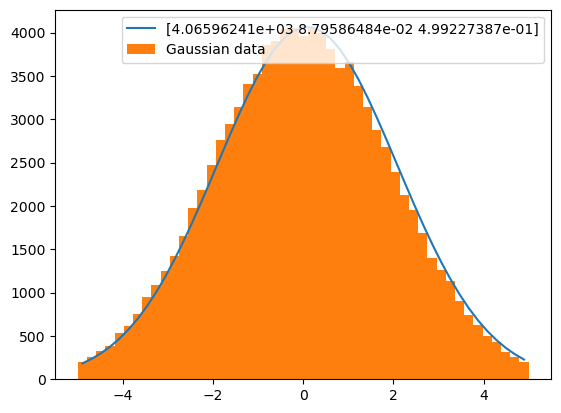

In [38]:
#plt.plot(binMidpoints, gaussian(binMidpoints, fittedParamValues[0],fittedParamValues[1],fittedParamValues[2]))
plt.plot(binMidpoints, gaussian(binMidpoints, *fittedParamValues), label=fittedParamValues)
plt.hist(values, label = 'Gaussian data', bins=np.linspace(-5,5,50))
plt.legend()